In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

### **1.Load The Dataset**

In [ ]:
i_a=pd.read_csv('/content/image_alphabets.csv')

### **Step 2 - Exploratory Data Analysis**

In [ ]:
i_a.shape

(87214, 65)

In [ ]:
i_a['label'].nunique()

10

In [ ]:
i_a['label'].value_counts(normalize = True)

label
C    0.268412
A    0.159036
E    0.131173
D    0.116198
B    0.099389
H    0.082763
G    0.066068
J    0.050784
F    0.013335
I    0.012842
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

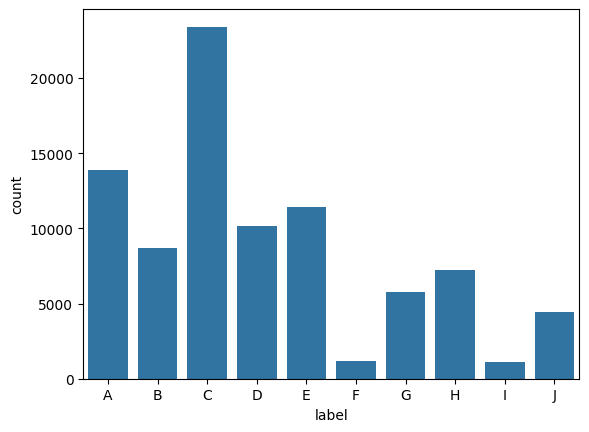

In [ ]:
sns.countplot(data=i_a, x='label')

Randomly Generated index: 176
Label of image at 176 index: A

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 0 0 0]
 [0 0 0 9 154 82 0.0 0.0]
 [0.0 0.0 8.0 134.0 169.0 121.0 0.0 0.0]
 [0.0 0.0 104.0 230.0 197.0 204.0 28.0 0.0]
 [0.0 21.0 179.0 65.0 131.0 98.0 4.0 0.0]
 [0.0 38.0 86.0 0.0 120.0 76.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 81.0 62.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]


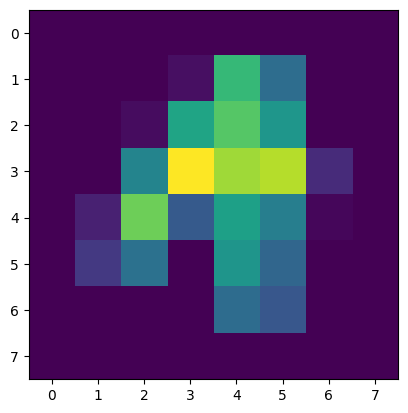

In [ ]:
idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", i_a.iloc[idx, -1])
print()

img = np.reshape(i_a.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

[54721 49922 29346 16392 77642 30058 12829 78878 75925]


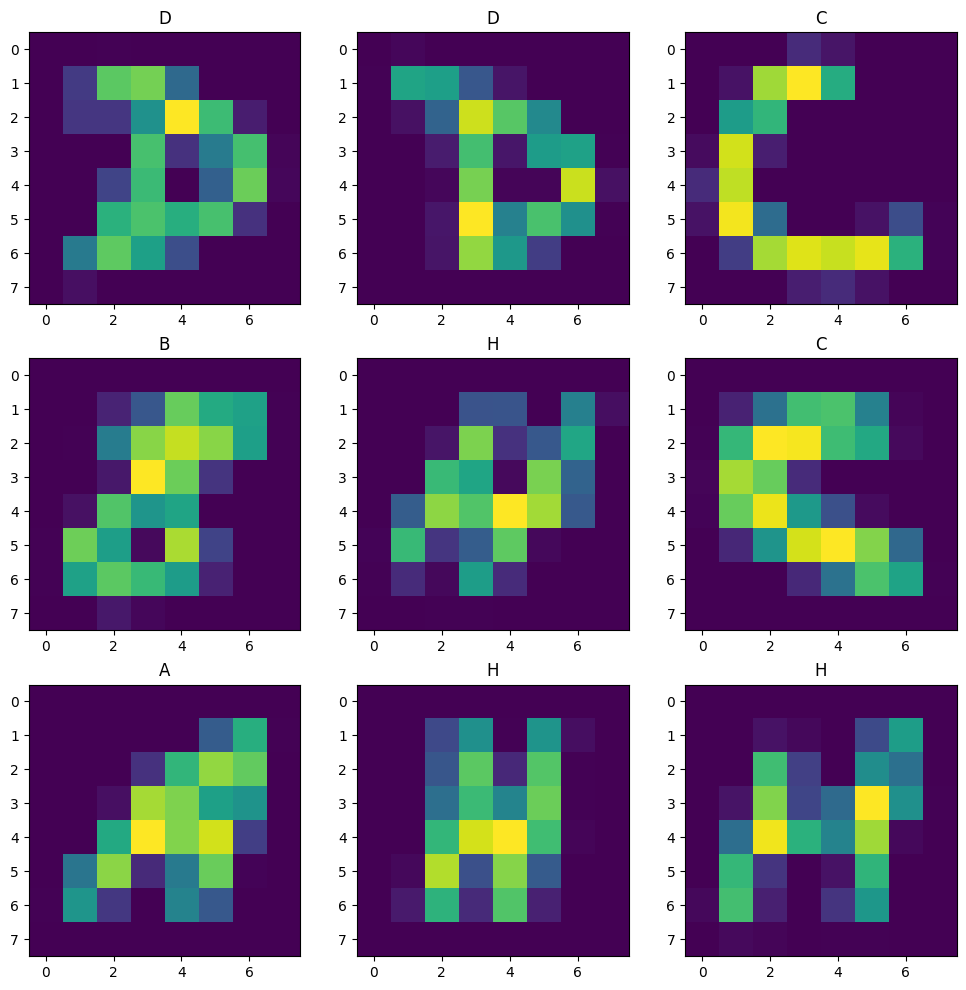

In [ ]:

plt.figure(figsize=(12, 12))
idx = np.random.randint(0, i_a.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = i_a.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(i_a.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)

In [ ]:
# Reset 'label' to a string if it has been overwritten
label = 'H'

# Now, try filling the missing values in the 'label' column of the DataFrame
i_a['label'] = i_a['label'].fillna('unknown')

In [ ]:
from sklearn.model_selection import train_test_split

strata_column = 'label'

# Check for classes with only one member
label_counts = i_a[strata_column].value_counts()
single_member_classes = label_counts[label_counts == 1].index.tolist()

# Remove rows with labels that appear only once
i_a_filtered = i_a[~i_a[strata_column].isin(single_member_classes)]

# Perform Stratified Sampling on the filtered DataFrame
i_a_sample, _ = train_test_split(i_a_filtered,
                                 test_size=(len(i_a_filtered) - 50000) / len(i_a_filtered),
                                 stratify=i_a_filtered[strata_column],
                                 random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(i_a_sample))

Sampled Dataset Size: 50000


### **Step 3 - Segregate Inputs (X) and Output (y)**

In [ ]:
X = i_a_sample.drop(columns = ['label'])
y = i_a_sample['label']

### **Step 4 - Split the data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 64) (40000,)
(10000, 64) (10000,)


### **Step 5 and 7 - Apply Data Preparation on Train and Test Data**

In [ ]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_train.index)

X_train_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
85430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.160920,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
22679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
4169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.018519,0.0,0.0,0.0
46220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.821839,...,0.126168,0.0,0.0,0.0,0.0,0.21875,0.009259,0.0,0.0,0.0


**Because of numerical features in dataframe so that we donot use standardiazation**

In [ ]:
# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

# Recreate the MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_train.index)

# Transform the test data using the fitted scaler
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_test.index)

X_test_transformed.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63
68769,0.0,0.0,0.000000,0.0,0.051282,0.043478,0.0,0.0,0.0,0.000000,...,0.228972,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006173,0.0
52376,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.206897,...,0.331776,0.0,0.0,0.0,0.0,0.0,0.000000,0.059524,0.006173,0.0
38015,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.028037,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
14449,0.0,0.0,0.000000,0.0,0.000000,0.021739,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.018519,0.000000,0.000000,0.0
61793,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


### **Step 6,8,9 - Training and Testing Phase**

### **1.logistics Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Logistic Regression
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

LR_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy :{metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Logistic Regression Model prediction Time: {LR_prediction_time:.2f} seconds")

CPU times: user 4.35 s, sys: 1.43 s, total: 5.79 s
Wall time: 3.06 s

Model's Accuracy :0.9073
Logistic Regression Model prediction Time: 0.01 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **2.Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Random Forest
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

RF_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random Forest Model Prediction Time: {RF_prediction_time:.2f} seconds")

CPU times: user 14.4 s, sys: 84.6 ms, total: 14.5 s
Wall time: 14.5 s

Model's Accuracy : 0.9775
Random Forest Model Prediction Time: 0.28 seconds


### **3.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Decision Tree
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

DT_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Decision Tree Model Prediction Time: {DT_prediction_time:.2f} seconds")

CPU times: user 2.05 s, sys: 3.25 ms, total: 2.06 s
Wall time: 2.08 s

Model's Accuracy : 0.9247
Decision Tree Model Prediction Time: 0.01 seconds


### **4.K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building the Model
classifier = KNeighborsClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for K Nearest Neighbor
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

KNN_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"K Nearest Neighbor Model Prediction Time: {KNN_prediction_time:.2f} seconds")

CPU times: user 56 ms, sys: 204 µs, total: 56.2 ms
Wall time: 55.5 ms

Model's Accuracy : 0.9705
K Nearest Neighbor Model Prediction Time: 4.46 seconds


### **5.Naive Bayes**

In [ ]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Naive Bayes
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

NB_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Naive Bayes Model Prediction Time: {NB_prediction_time:.2f} seconds")

CPU times: user 129 ms, sys: 2.71 ms, total: 132 ms
Wall time: 129 ms

Model's Accuracy: 0.7607
Naive Bayes Model Prediction Time: 0.01 seconds


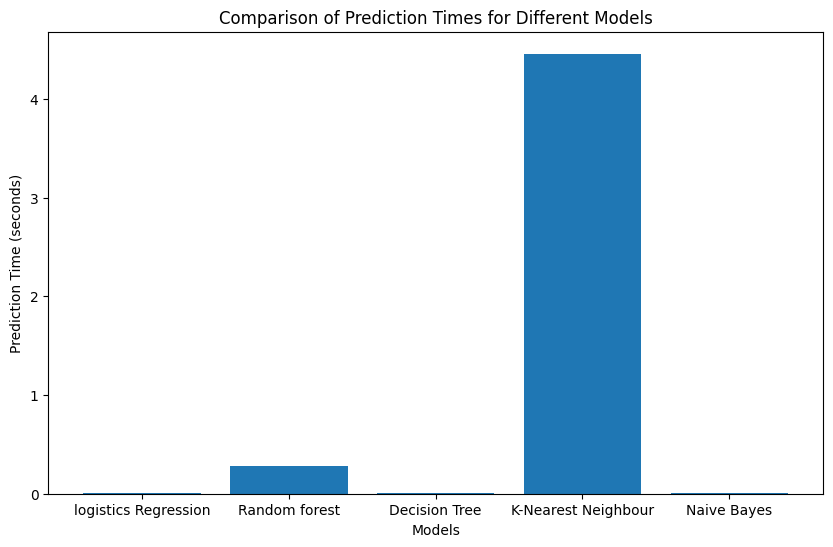

In [ ]:
# Model names
model_names = ['logistics Regression','Random forest','Decision Tree','K-Nearest Neighbour','Naive Bayes']

# Prediction times
prediction_times = [LR_prediction_time,RF_prediction_time,DT_prediction_time,KNN_prediction_time,NB_prediction_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, prediction_times)
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Prediction Times for Different Models')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns


idx = np.random.randint(0, 1796)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", i_a.iloc[idx, -1])
print()

img = np.reshape(i_a.iloc[idx, 0:-1], (8,8))

print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)




plt.figure(figsize=(12, 12))
idx = np.random.randint(0, i_a.shape[0], 9)
print(idx)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    label = i_a.iloc[idx[i], -1]
    plt.title(label)
    img_grid = np.reshape(i_a.iloc[idx[i], 0:-1], (8,8))
    img_grid = img_grid.astype("float")
    plt.imshow(img_grid)





  # Reset 'label' to a string if it has been overwritten
label = 'H'

# Now, try filling the missing values in the 'label' column of the DataFrame
i_a['label'] = i_a['label'].fillna('unknown')



from sklearn.model_selection import train_test_split

strata_column = 'label'

# Check for classes with only one member
label_counts = i_a[strata_column].value_counts()
single_member_classes = label_counts[label_counts == 1].index.tolist()

# Remove rows with labels that appear only once
i_a_filtered = i_a[~i_a[strata_column].isin(single_member_classes)]

# Perform Stratified Sampling on the filtered DataFrame
i_a_sample, _ = train_test_split(i_a_filtered,
                                 test_size=(len(i_a_filtered) - 50000) / len(i_a_filtered),
                                 stratify=i_a_filtered[strata_column],
                                 random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(i_a_sample))



X = i_a_sample.drop(columns = ['label'])
y = i_a_sample['label']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_train.index)

X_train_transformed.head()




# Rescaling numerical features
from sklearn.preprocessing import MinMaxScaler

# Recreate the MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_train.index)

# Transform the test data using the fitted scaler
X_test_transformed = pd.DataFrame(minmax_scaler.transform(X_test),
                                    columns = minmax_scaler.get_feature_names_out(),
                                    index = X_test.index)

X_test_transformed.head()





from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Logistic Regression
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

LR_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy :{metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Logistic Regression Model prediction Time: {LR_prediction_time:.2f} seconds")



from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Random Forest
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

RF_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Random Forest Model Prediction Time: {RF_prediction_time:.2f} seconds")




from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Decision Tree
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

DT_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Decision Tree Model Prediction Time: {DT_prediction_time:.2f} seconds")


from sklearn.neighbors import KNeighborsClassifier

# Building the Model
classifier = KNeighborsClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for K Nearest Neighbor
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

KNN_prediction_time = time.time() - start_time

# Model's Evaluation
print()
print(f"Model's Accuracy : {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"K Nearest Neighbor Model Prediction Time: {KNN_prediction_time:.2f} seconds")



import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB()
%time classifier.fit(X_train_transformed, y_train)

# Measure prediction time for Naive Bayes
start_time = time.time()

# Predicting on unseen data
y_test_pred = classifier.predict(X_test_transformed)

NB_prediction_time = time.time() - start_time

# Model Evaluation
print()
print(f"Model's Accuracy: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Naive Bayes Model Prediction Time: {NB_prediction_time:.2f} seconds")



# Model names
model_names = ['logistics Regression','Random forest','Decision Tree','K-Nearest Neighbour','Naive Bayes']

# Prediction times
prediction_times = [LR_prediction_time,RF_prediction_time,DT_prediction_time,KNN_prediction_time,NB_prediction_time]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, prediction_times)
plt.xlabel('Models')
plt.ylabel('Prediction Time (seconds)')
plt.title('Comparison of Prediction Times for Different Models')
plt.show()